In [53]:
# data handeling libraries
import pandas as pd 
import numpy as np 
from collections import OrderedDict

# data visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

## library to filter warnings 

import warnings
warnings.filterwarnings ("ignore")

##preprocessing library

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

## model bulding libraries 

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve

## model evaluation libraries

from sklearn.metrics import r2_score, mean_squared_error 

## machien learning model libraries 

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import xgboost
from xgboost import XGBRegressor

## importing clustering 
from sklearn.cluster import KMeans


SyntaxError: invalid syntax (Temp/ipykernel_20272/2664408073.py, line 1)

In [2]:
df = pd.read_excel("Capstone Project.xlsx")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.shape

(1030, 9)

In [4]:
def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result = pd.DataFrame(result)
    ##skewness type

    skewtype =[]
    
    for i in result['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result['Skew_Type'] = skewtype
   ## Kurtosis Type
    k_type = []
    
    for i in result['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: 
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result['Kurtosis_Type'] = k_type

    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result['outlier_comment'] = outlier_comment
    
    result['outlier_percentage'] = outlier_percentage
   
    return result


In [5]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,cement,1030,102.00,192.375,281.167864,272.900,350.000,540.0,10921.580220,104.506364,-0.520652,0.509481,157.625,Moderately Positively Skewed,Moderately Platykurtic Curve,has outliers,0.003883
1,slag,1030,0.00,0.000,73.895825,22.000,142.950,359.4,7444.124812,86.279342,-0.508175,0.800717,142.950,Moderately Positively Skewed,Moderately Platykurtic Curve,has outliers,0.003883
2,ash,1030,0.00,0.000,54.188350,0.000,118.300,200.1,4095.616541,63.997004,-1.328746,0.537354,118.300,Moderately Positively Skewed,Highly Platykurtic Curve,has outliers,0.003883
3,water,1030,121.80,164.900,181.567282,185.000,192.000,247.0,456.002651,21.354219,0.122082,0.074628,27.100,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.003883
4,superplastic,1030,0.00,0.000,6.204660,6.400,10.200,32.2,35.686781,5.973841,1.411269,0.907203,10.200,Moderately Positively Skewed,Highly Leptokurtic Curve,has outliers,0.003883
5,coarseagg,1030,801.00,932.000,972.918932,968.000,1029.400,1145.0,6045.677357,77.753954,-0.599016,-0.040220,97.400,Approx Normal Distribution (-ve),Moderately Platykurtic Curve,has outliers,0.003883
6,fineagg,1030,594.00,730.950,773.580485,779.500,824.000,992.6,6428.187792,80.175980,-0.102177,-0.253010,93.050,Approx Normal Distribution (-ve),Mesokurtic Curve,has outliers,0.003883
7,age,1030,1.00,7.000,45.662136,28.000,56.000,365.0,3990.437729,63.169912,12.168989,3.269177,49.000,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.003883
8,strength,1030,2.33,23.710,35.817961,34.445,46.135,82.6,279.081814,16.705742,-0.313725,0.416977,22.425,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.003883


## conclusions from the custom summary

In [6]:
# 1 from the above custom summary we can say that there are no any null values.
# 2 from the above data we can say that age is highly positively skewed 
# 3 cement,slag,ash,superplastic this features are moderately positively skewed
# 4 age and superplastic is highly leptokurtic.
# 5 ash is highly platykurtic.
# 6 almost all columns in the dataset has outliers and in same % 
# so there are high chances that some particular records are noisy.
# 7 from maximum age we can say that data is for yearly data.

In [7]:
def outlier_treatment(df,col,method="quartile",strategy = "median"):
    col_data = df[col]
    
    # using quartile method to find outliers 
    
    if method == "quartile":
        q2 = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1 
        lowerlimit = q1 - 1.5*iqr
        upperlimit = q3 + 1.5*iqr
        
     # using std dav method to find outliers 
    
    elif method == "standerd_daviation":
        col_mean = df[col].mean()
        col_std = df[col].std()
        lowerlimit = col_mean - 2*col_std
        upperlimit = col_mean + 2*col_std
        
    else:
        print("Pass a correct method")
        
    # printing outliers 
    
    outliers = df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col]
    outlier_density = round(len(outliers)/len(df),2)
    
    if len(outliers) == 0 :
        print(f"the column {col} has no outliers")
    else:
        print(f"the column {col} has outliers")
        print("the outlier percentage is", outlier_density)
        print("outliers of column are : ")
        display(df[( col_data < lowerlimit ) | (col_data > upperlimit)])
    
    ## replacing outliers 
    if strategy == "median":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].median()
    
    elif strategy == "mean":
        df.loc[( col_data < lowerlimit ) | (col_data > upperlimit) ,col] = df[col].mean() 
 
    else:
        print("Pass a correct strategy")
                      
    return (df) 

## ODT plots : Outlier detection plot
* in this we plot three graphs 
* 1 Boxplot for descriptive statistics 
* 2 histogram with outliers 
* 3 histogram without outliers 

In [8]:
def odt_plot(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))
    
    # plotting boxplot 
    
    sns.boxplot(df[col],ax=ax1)
    ax1.set_title(col + " Boxplot")
    ax1.set_xlabel("Boxplot")
    ax1.set_ylabel("Values")
    
    # plotting Histogram with outliers 
    
    sns.distplot(df[col],ax=ax2)
    ax2.set_title(col + " Histogram with outliers")
    ax2.set_xlabel("Density")
    ax2.set_ylabel("Values")
    
    
    # plotting Histogram without outliers 
    
    y = outlier_treatment(df,col)
    
    sns.distplot(y[col],ax=ax3)
    ax3.set_title(col + " Histogram without outliers")
    ax3.set_xlabel("Density")
    ax3.set_ylabel("Values")

the column cement has no outliers
the column slag has outliers
the outlier percentage is 0.0
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


the column ash has no outliers
the column water has outliers
the outlier percentage is 0.01
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


the column superplastic has outliers
the outlier percentage is 0.01
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


the column coarseagg has no outliers
the column fineagg has outliers
the outlier percentage is 0.0
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


the column age has outliers
the outlier percentage is 0.06
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


the column strength has outliers
the outlier percentage is 0.0
outliers of column are : 


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


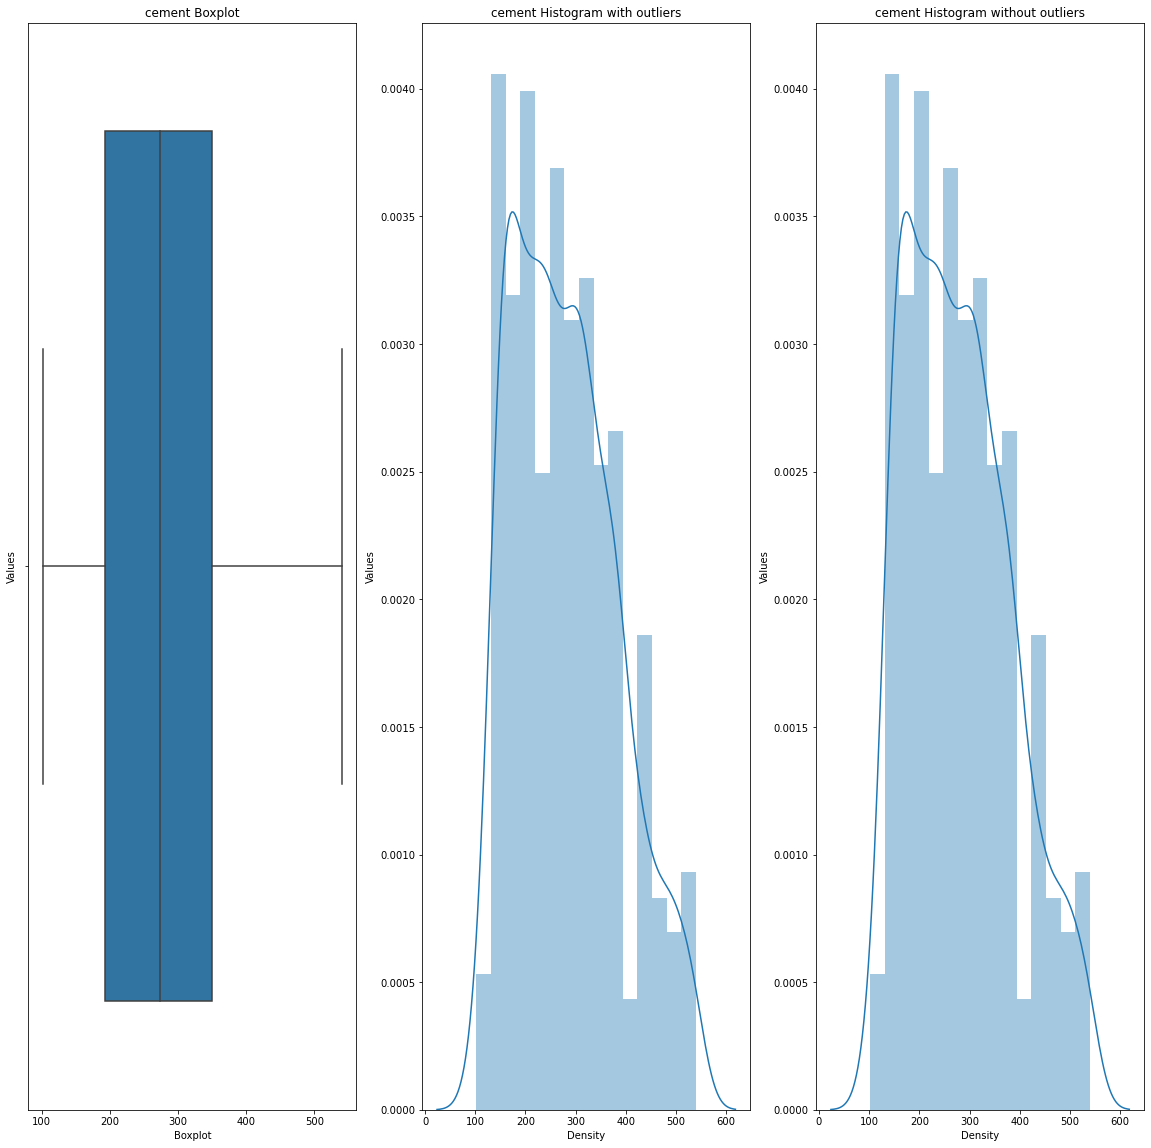

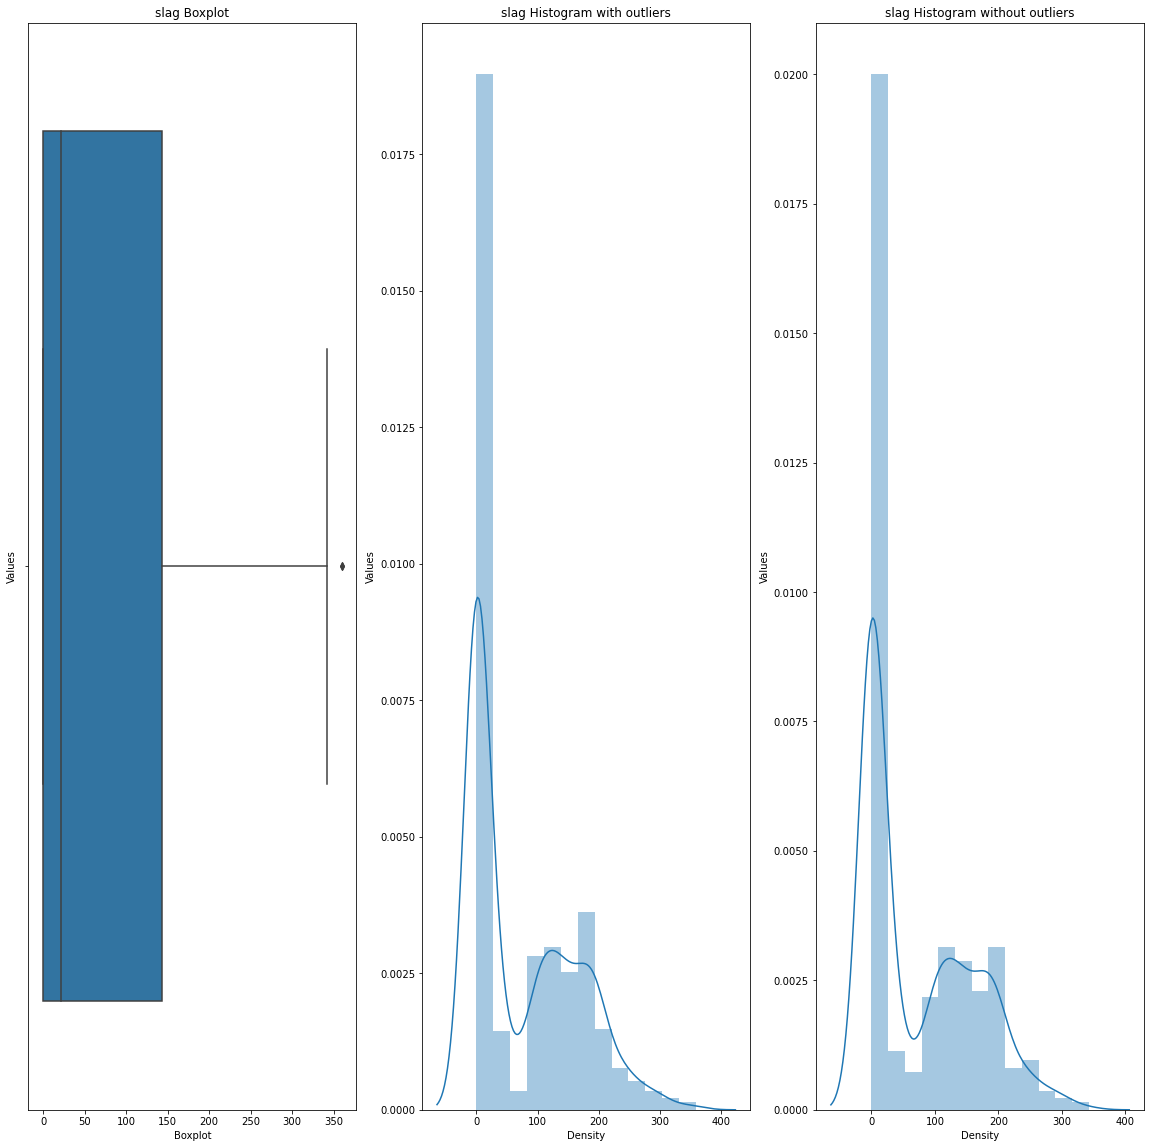

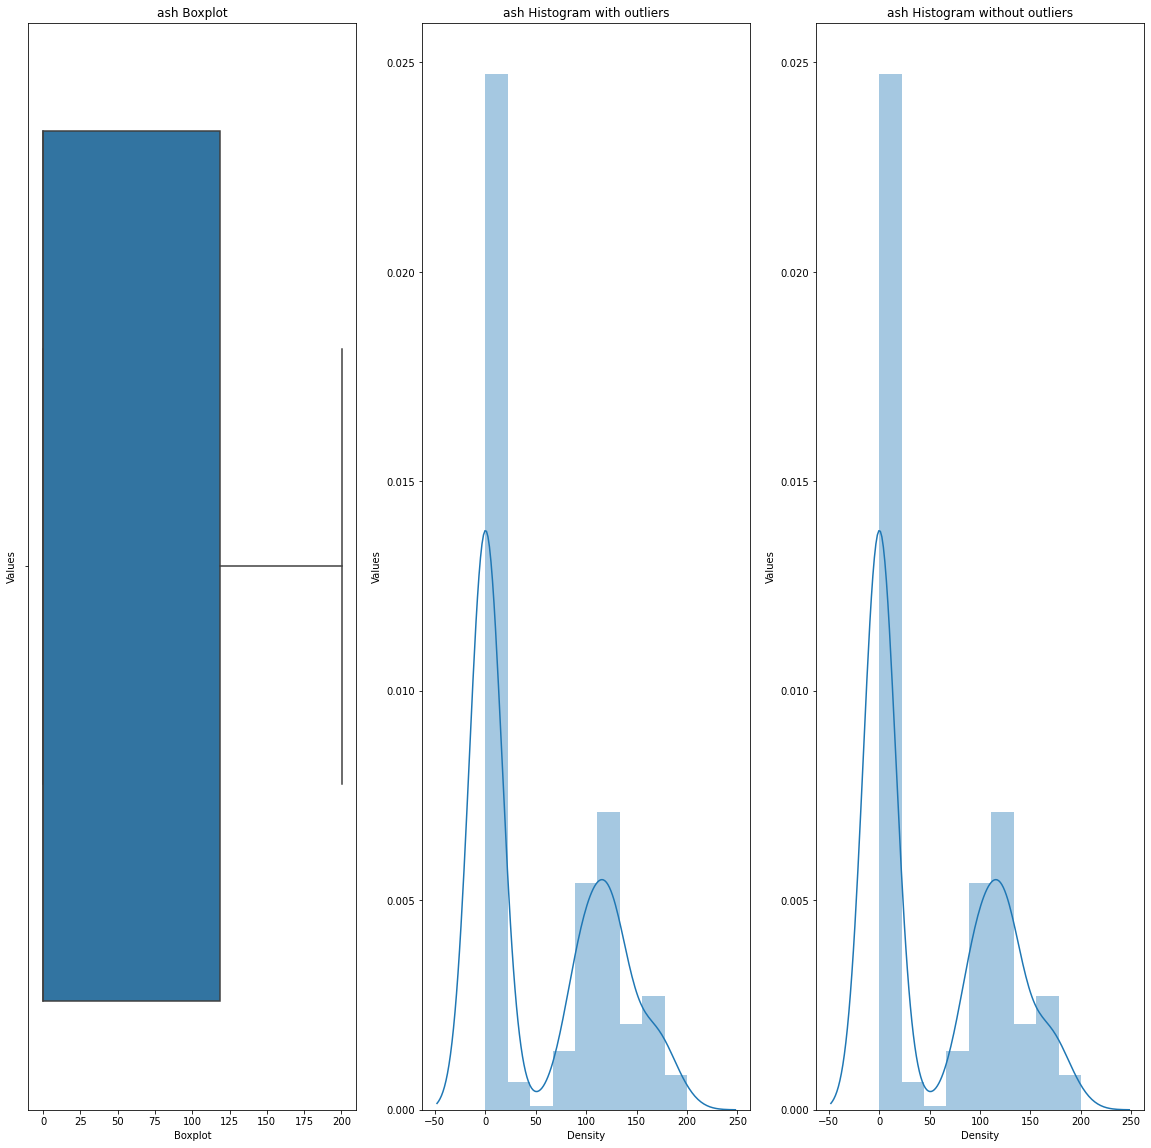

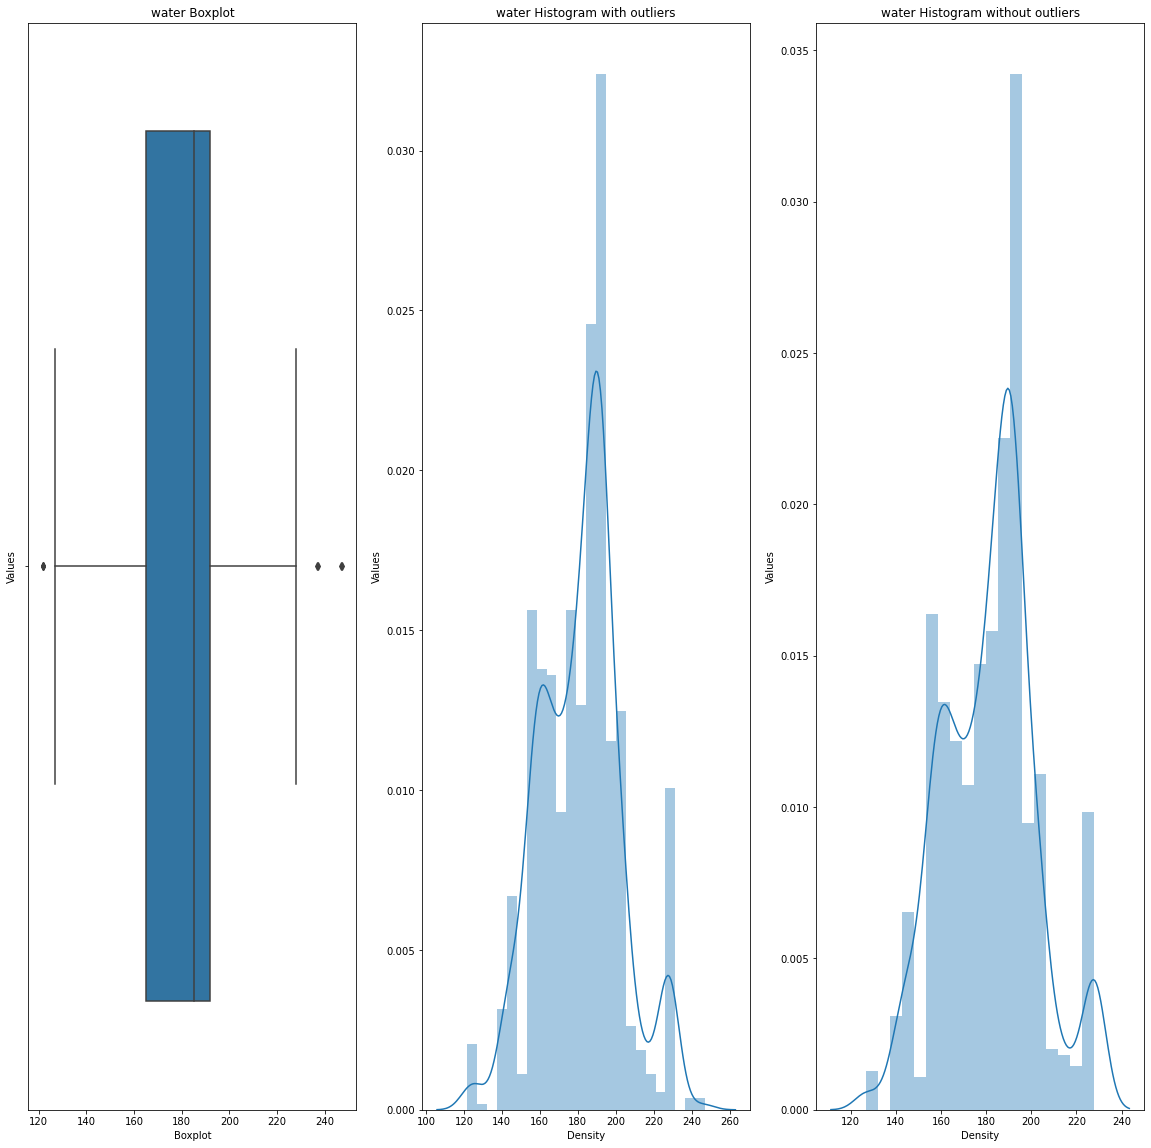

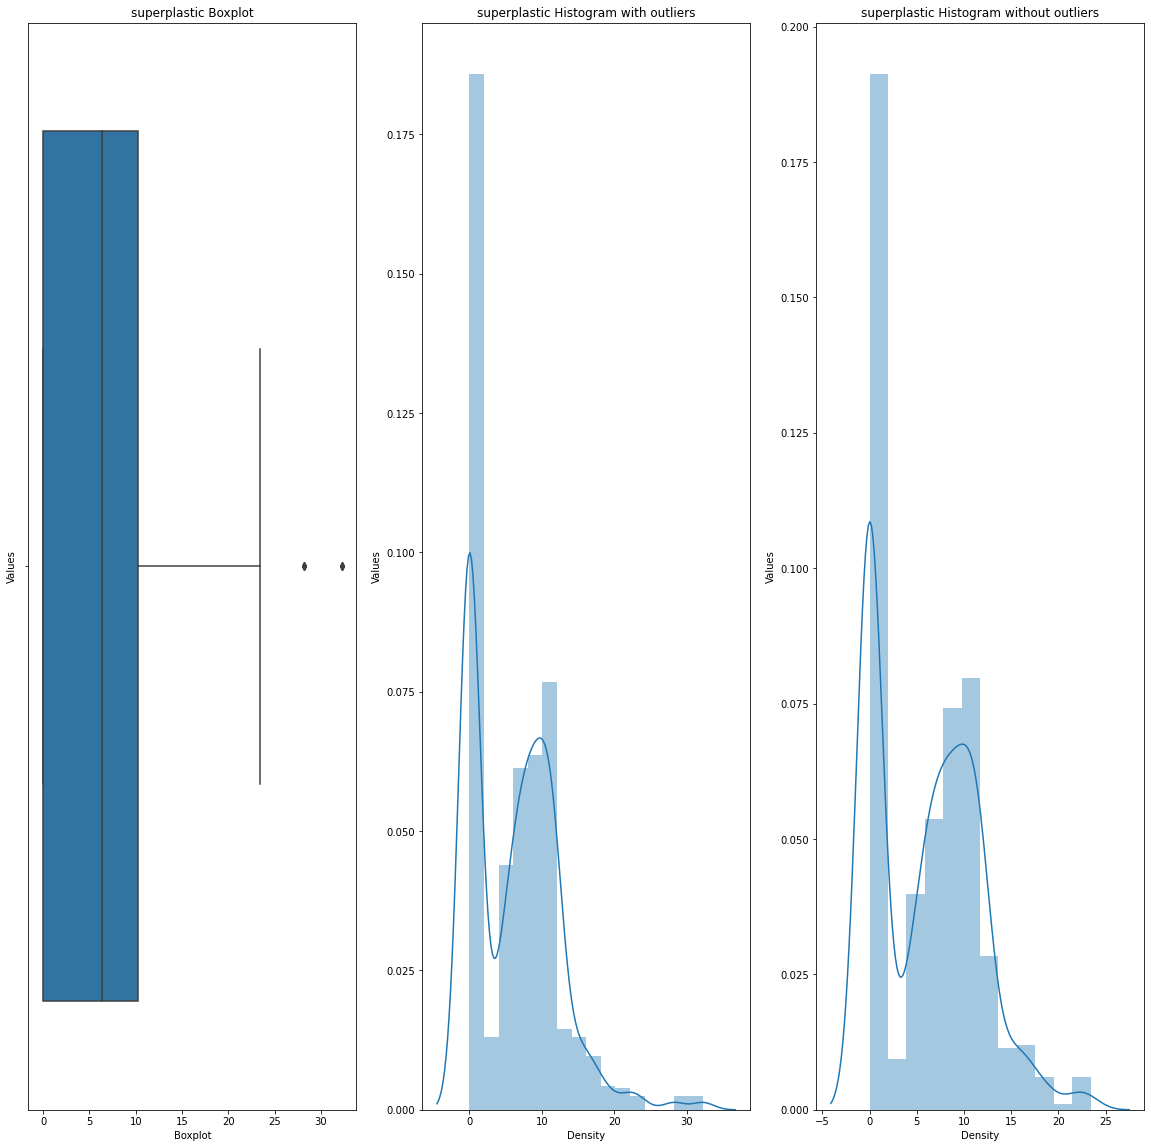

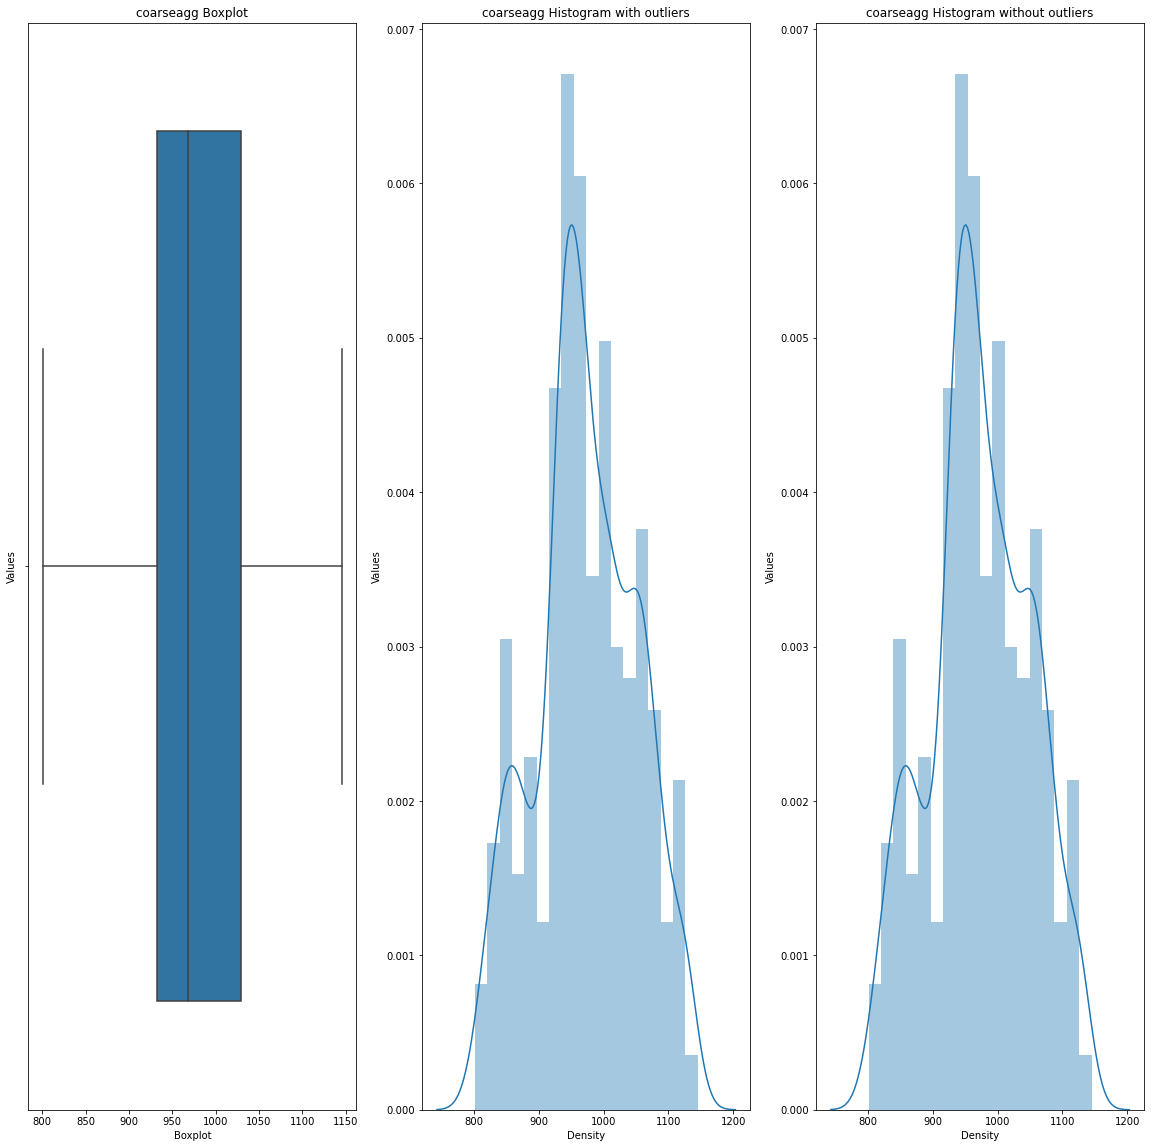

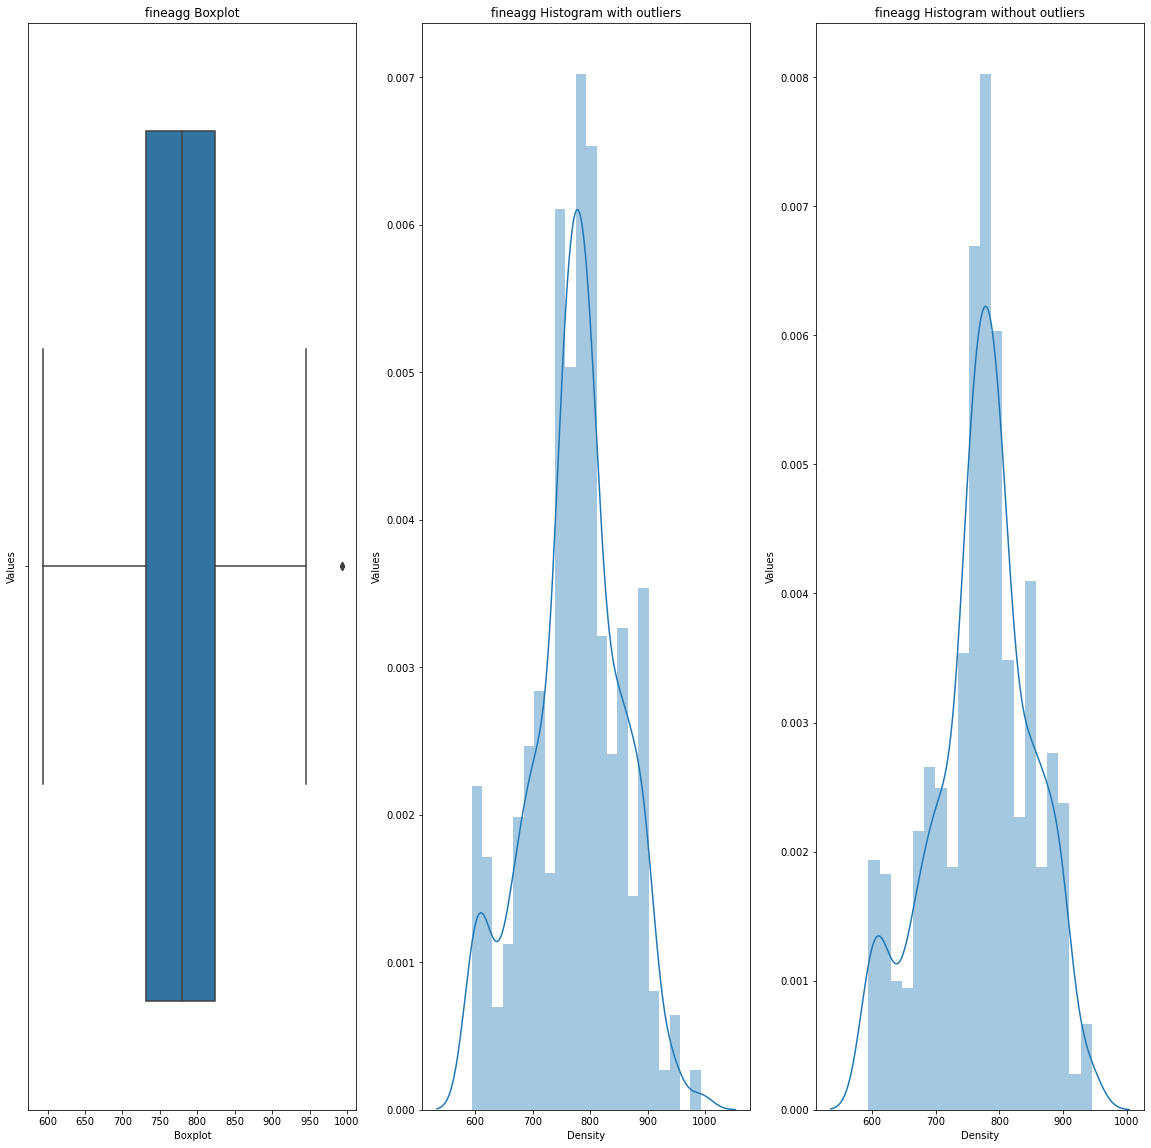

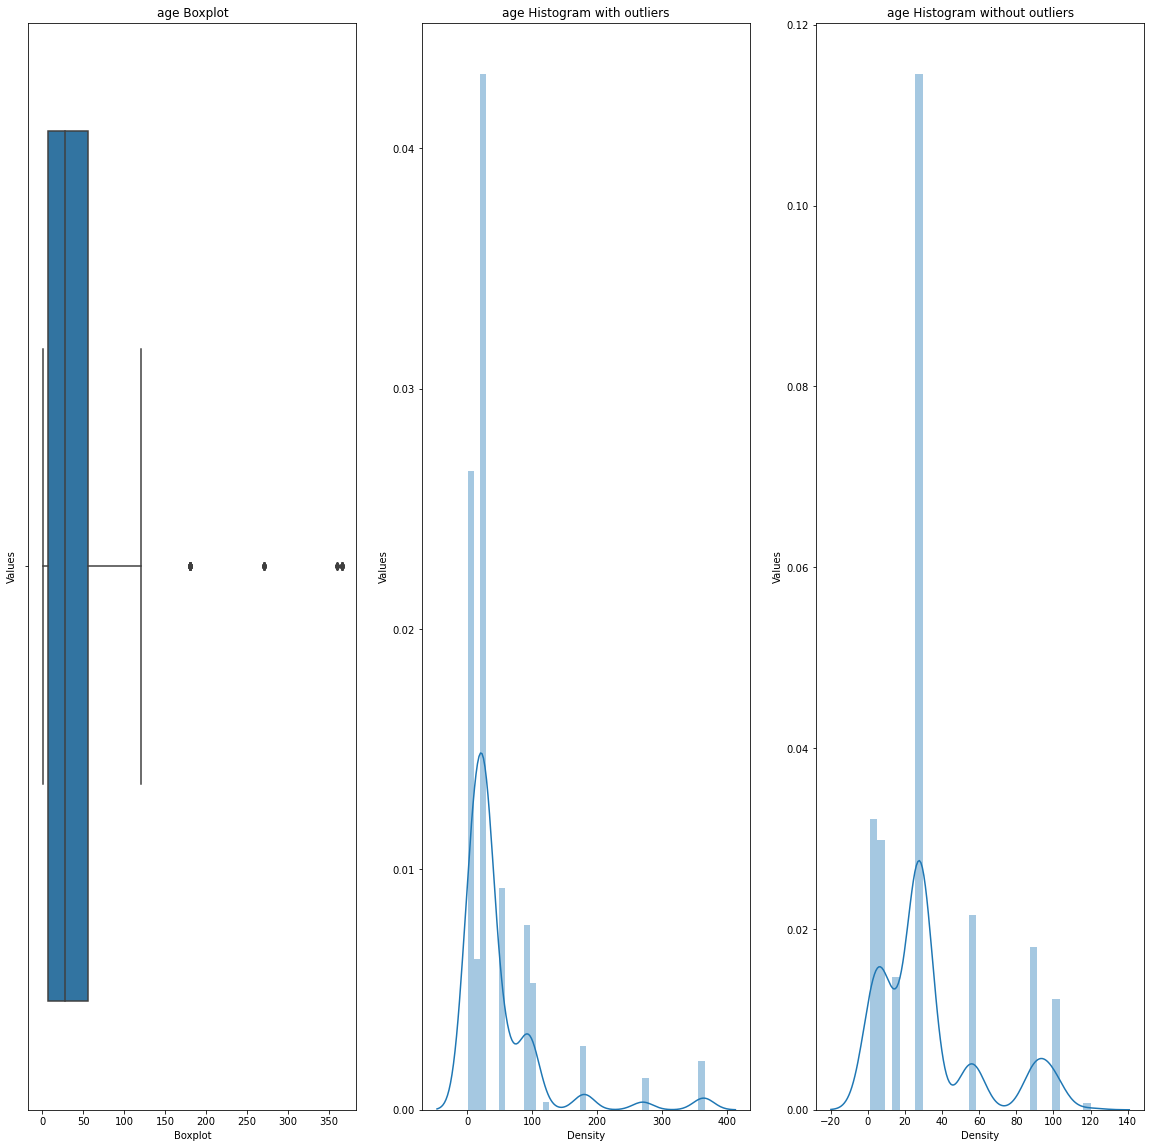

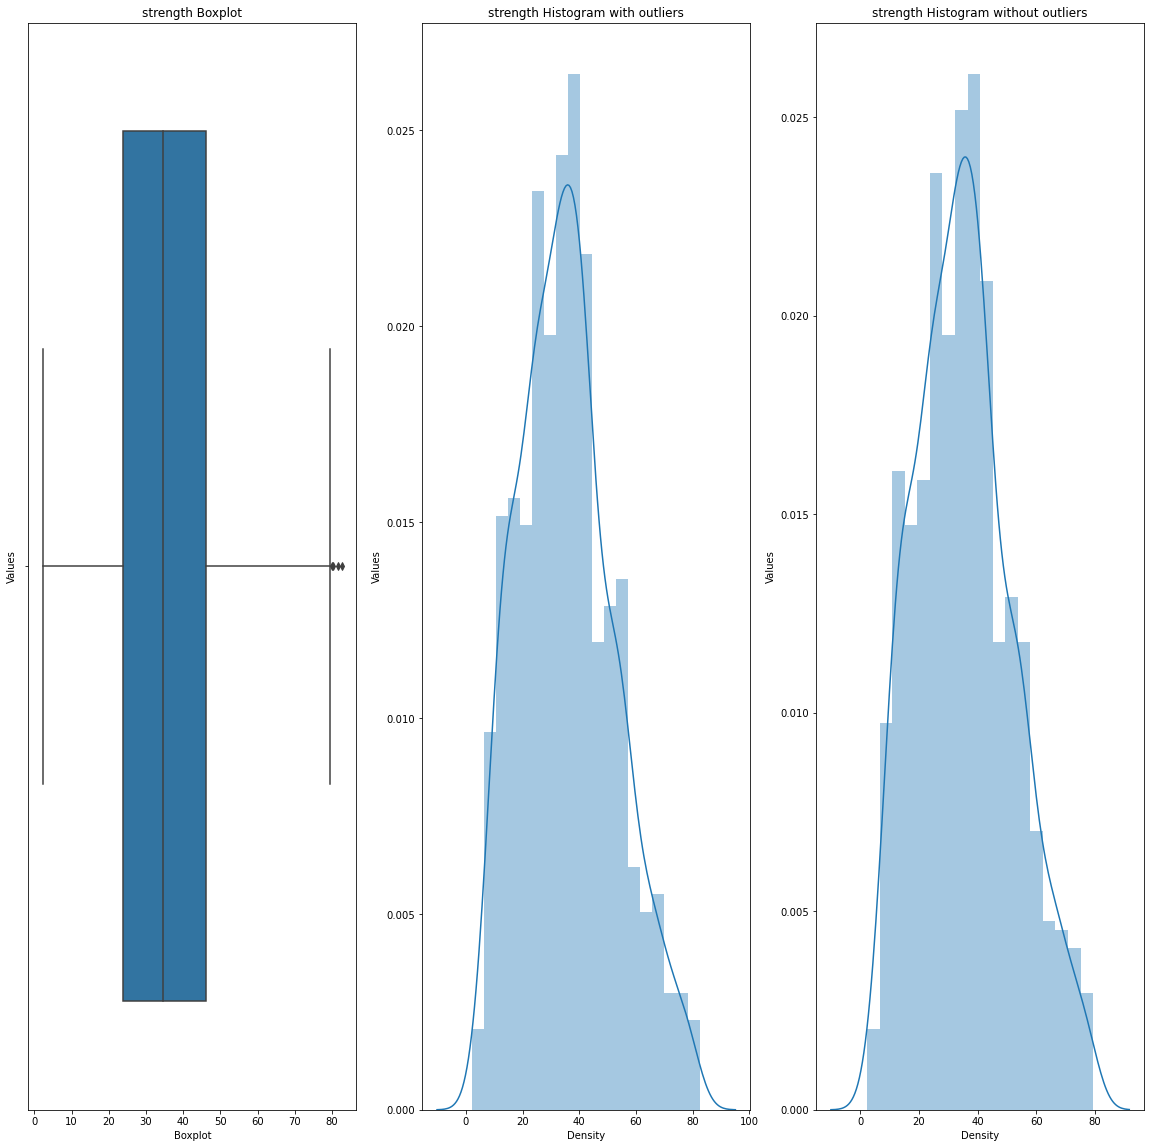

In [9]:
for col in df.columns:
    odt_plot(df,col)

## multivariate analysis 

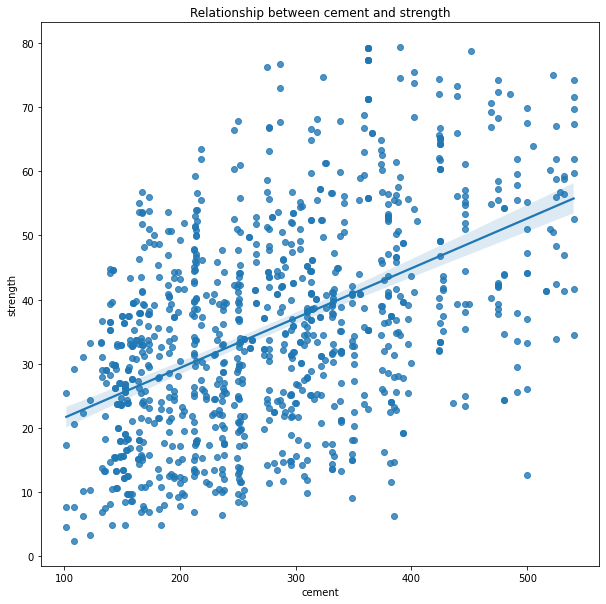

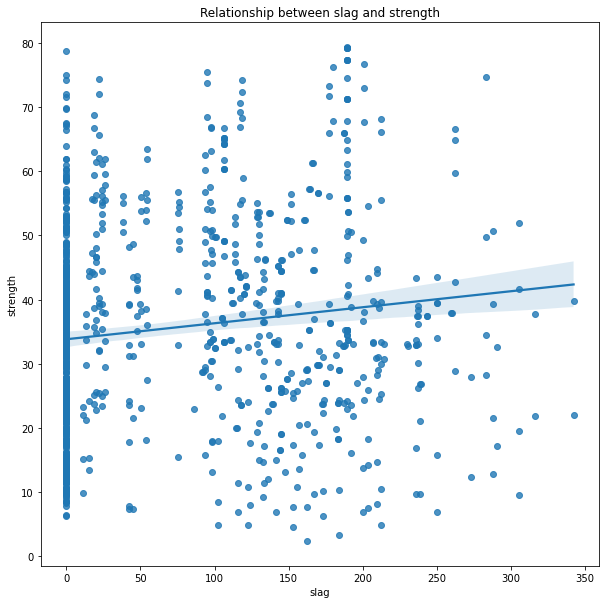

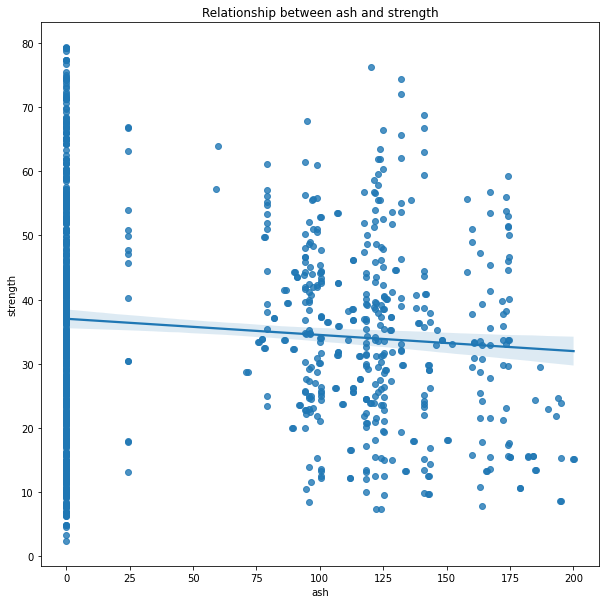

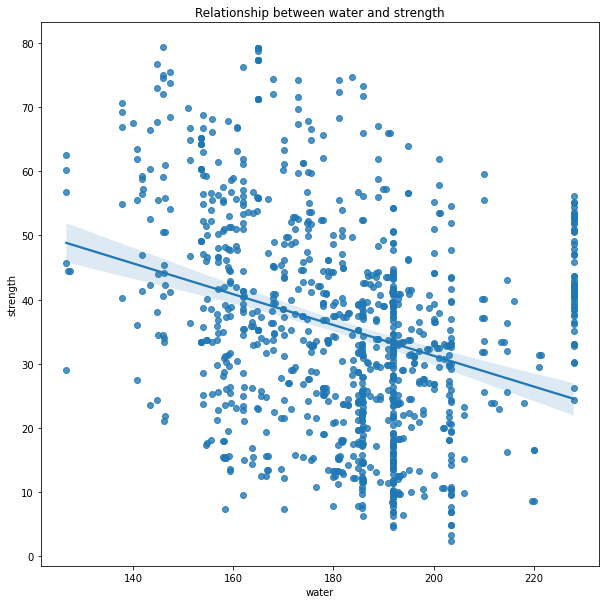

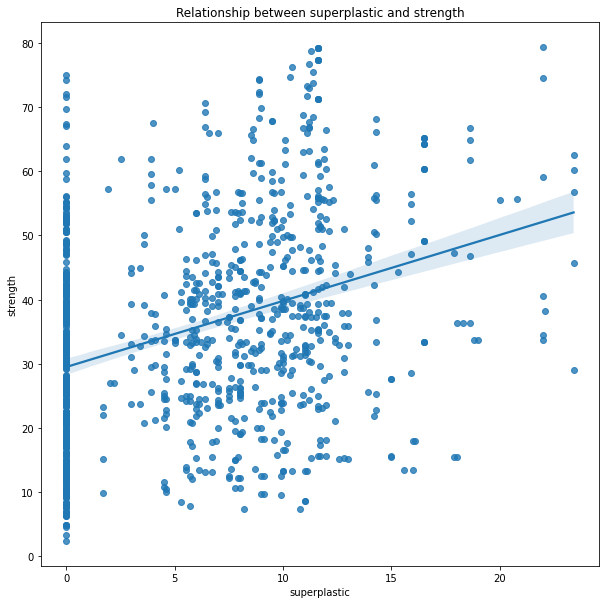

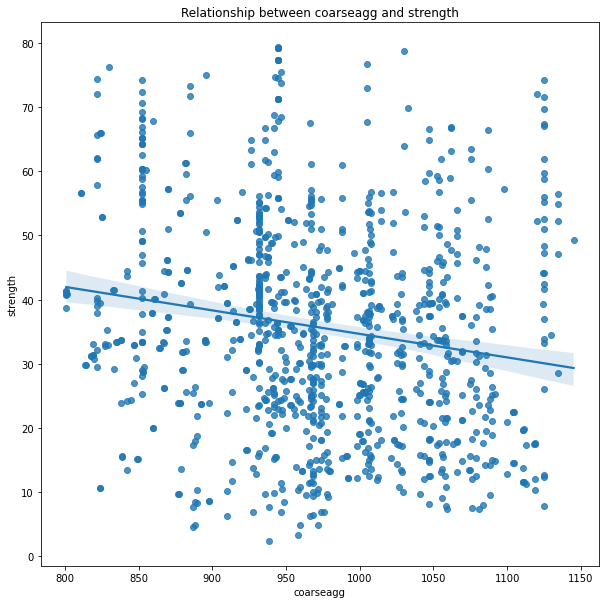

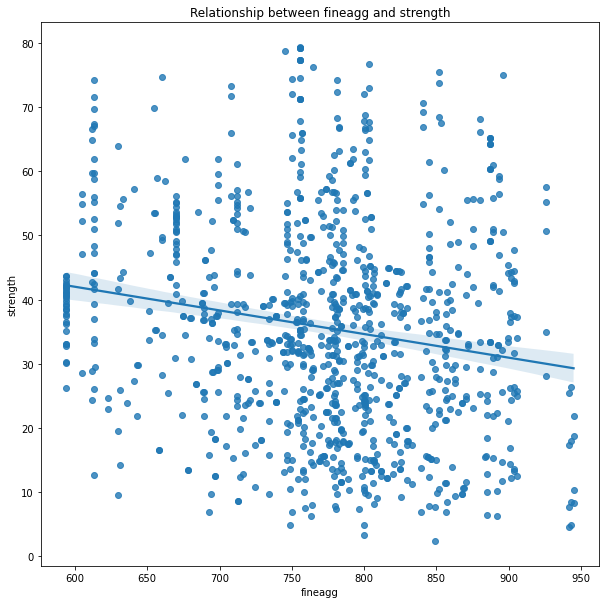

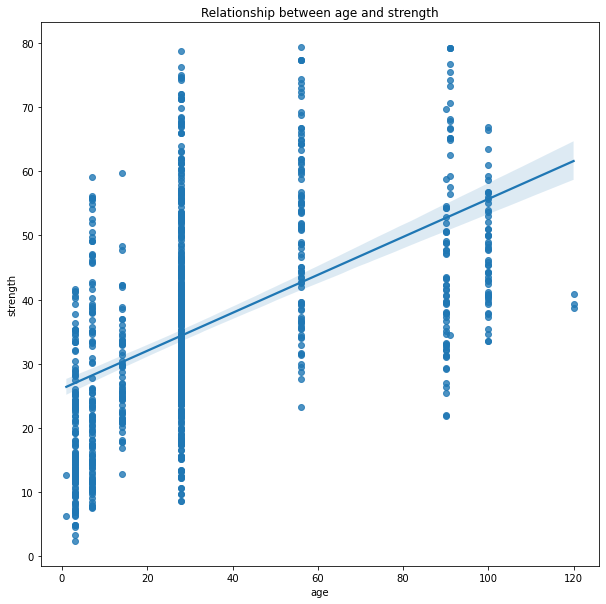

In [10]:
for col in df.columns:
    if col != "strength":
        f,ax = plt.subplots(figsize = (10,10))
        sns.regplot(x=df[col],y=df["strength"],ax=ax).set_title(f"Relationship between {col} and strength") 

### conclusions of multi-covariate analysis
* 1.strength and cement has positive correlation 49%
* 2.strength and slag has slight positive correlation 12%
* 3.strength and ash has slightly negative correlation 9%
* 4.strength and water has negative correlation 30%
* 5.strength and superplastic has positive correlation 34%
* 6.strength and coarsagg has negative correlation 17%
* 7.strength and fineagg has negative correlation 17%
* 8.strength and age has positive correlation 50%

### finding out correlation percentage 

In [11]:
def correlation_target(df,t_col):
    ind_var = df.drop(t_col,axis=1).columns 
    corr_result = []
    for col in ind_var:
        corr_result.append(df[t_col].corr(df[col]))
        
    result_df = pd.DataFrame([ind_var,corr_result],index=["variable","correaltion"]).T
    return result_df.sort_values("correaltion",ascending=False)


In [12]:
correlation_target(df,"strength")

,variable,correaltion
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.097973
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


<AxesSubplot:>

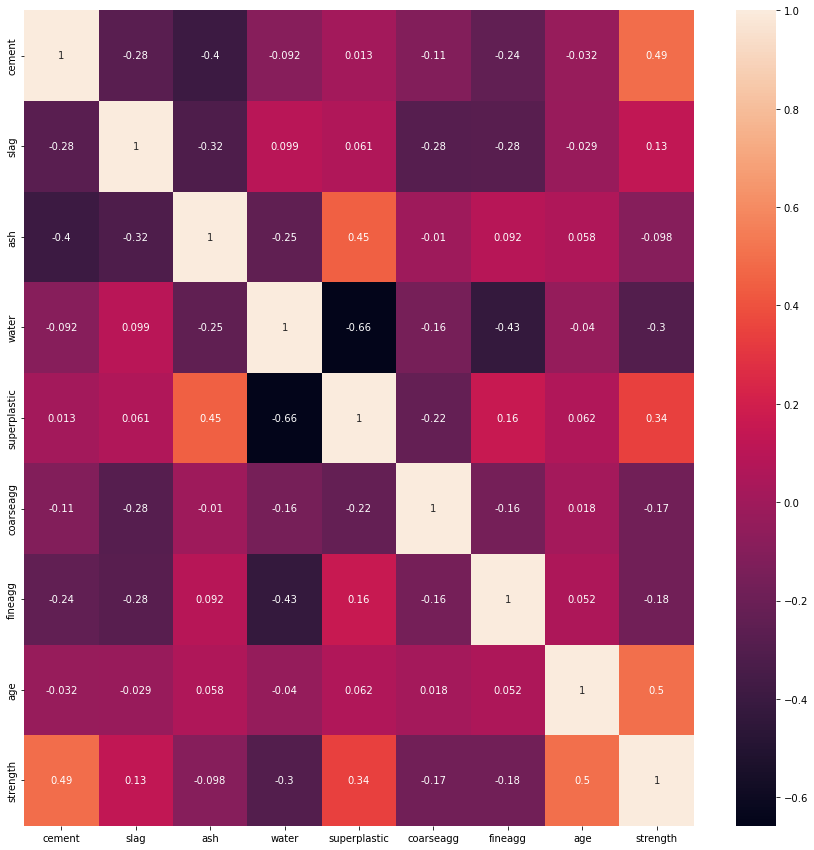

In [13]:
## checking for multi-collinearity

cor = df.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [14]:
# conclusions of multicollinearity check 
# 1.superplatic and ash 45%
# 2.superplatic and water 66%
# 3.slag and ash 32%
# 4.slash and fineagg 31%
# 5.water and fineagg 33%
# 6.cement and ash 40%

## Mulicollenearity check 2 (VIF Method)
* VIF stands for varaiance inflation factor 
* In VIF we regress every independant variable with each other and find the r-square 
* after finding r-square we use below VIF formula to find VIF index 
* VIF index = 1/1-r.square
* if VIF is more than 5 then we say that multi-collinearity exists

In [15]:
def vif(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result_df = pd.DataFrame() 
    result_df["Feature"] = ind_var.columns
    result_df["vif"] = [variance_inflation_factor(ind_var.values,i)for i in range(ind_var.shape[1])]
    return result_df

In [16]:
vif(df.drop("strength",axis=1)) ## as the VIF value is very high he data is multi-collinear 

,Feature,vif
0,cement,14.291158
1,slag,3.342314
2,ash,4.415840
3,water,81.963087
4,superplastic,5.724145
5,coarseagg,86.938582
6,fineagg,68.664404
7,age,2.368372


## as the data has the lot of multicollinerity applying PCA 

In [17]:
def apply_pca(x): 
    
    col = []
    n_comp = len(x.columns)
    
    # step1: applying standerd scaler
    
    x = StandardScaler().fit_transform(x) 
    
    # step2: applying PCA
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_components = pca.fit_transform(x) 
        
        evr = np.cumsum(pca.explained_variance_ratio_)
        
        if evr[i-1] > 0.9:
            n_components = i 
            break
            
    ## creating the DataFrame
    
    for j in range(1,n_components+1):
        col.append("PC_"+str(j))
        
    result_df = pd.DataFrame(p_components,columns=col)
    
    return result_df

In [18]:
x = df.drop("strength",axis=1)
x.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [19]:
y = df[["strength"]] 
y.head() 

,strength
0,29.89
1,23.51
2,29.22
3,45.85
4,18.29


In [20]:
x_pca = apply_pca(x) 

In [21]:
x_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228


## model_building 

In [23]:
#1 normal model building 
#2 cross validation
#3 hyper parameter tunning 

In [24]:
def train_and_test_split(x,y,test_size=0.3):
    return train_test_split(x,y,test_size=test_size,random_state=40)

In [25]:
def build_model(model_name,estimator,x,y):
    x_train,x_test,y_train,y_test = train_and_test_split(x,y) 
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test) 
    r2score = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    temp = [model_name,r2score,rmse] 
    
    return temp 

In [26]:
build_model("Linear_Regression",LinearRegression(),x_pca,y) 

['Linear_Regression', 0.6719558938761188, 9.32019549758269]

In [27]:
def build_multiple_model(x,y):
    result_df = pd.DataFrame(columns=["Model_Name","R2_Score","RMSE"])
    
    result_df.loc[len(result_df)] = build_model("Linear_Regression",LinearRegression(),x,y)
    result_df.loc[len(result_df)] = build_model("Lasso_Reression",Lasso(),x,y)
    result_df.loc[len(result_df)] = build_model("Ridge_Regression",Ridge(),x,y) 
    result_df.loc[len(result_df)] = build_model("KNN_Regression",KNeighborsRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Decision_Tree_Regression",DecisionTreeRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Random_Forest_Regression",RandomForestRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Adaboost_Regression",AdaBoostRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("GBoost_Regression",GradientBoostingRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("XGB_Regression",XGBRegressor(),x,y) 
    result_df.loc[len(result_df)] = build_model("Support_Vector_Regression",SVR(),x,y) 
    
    return result_df.sort_values("R2_Score",ascending=False)

In [28]:
build_multiple_model(x_pca,y) 

,Model_Name,R2_Score,RMSE
5,Random_Forest_Regression,0.851051,6.280261
8,XGB_Regression,0.843865,6.429975
7,GBoost_Regression,0.827281,6.762842
3,KNN_Regression,0.751607,8.110144
6,Adaboost_Regression,0.740296,8.292745
4,Decision_Tree_Regression,0.734247,8.388763
0,Linear_Regression,0.671956,9.320195
2,Ridge_Regression,0.671954,9.320220
1,Lasso_Reression,0.655825,9.546597
9,Support_Vector_Regression,0.653021,9.585403


In [29]:
def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(),x,y,cv=fold)
    score_rd = cross_val_score(Ridge(),x,y,cv=fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_ad = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_g = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    
    score = [score_lr,score_la,score_rd,score_dtr,score_knn,score_rf,score_ad,score_g,score_xgb,score_svr]
    models = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree Regression","KNN Regression","Random forest Regression","Adaboost Regression","GBoost Regression","XGBoost Regression","Support vector machines Regression"]
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i]) 
        score_std = np.std(score[i]) 
        model_name = models[i]
        temp = [model_name,score_mean,score_std]
        result.append(temp)
        
    result_df = pd.DataFrame(result,columns=["model_name","score_mean","score_std"])
    
    return result_df.sort_values("score_mean",ascending=False)

In [30]:
k_fold_cv(x_pca,y) 

,model_name,score_mean,score_std
8,XGBoost Regression,0.873262,0.036061
5,Random forest Regression,0.866264,0.033087
7,GBoost Regression,0.829250,0.050252
4,KNN Regression,0.767825,0.055738
3,Decision Tree Regression,0.762318,0.058614
6,Adaboost Regression,0.723020,0.043631
9,Support vector machines Regression,0.703117,0.042765
2,Ridge Regression,0.663935,0.059437
0,Linear Regression,0.663928,0.059476
1,Lasso Regression,0.649837,0.049887


In [31]:
def hyperparameter_tunning(x,y,fold=10):
    param_ls = {"alpha": [1e-15, 1e-13,1e-11,1e-9,1e-7,1e-5, 1e-3,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {"alpha": [1e-15, 1e-13,1e-11,1e-9,1e-7,1e-5, 1e-3,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_knn = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
    param_adb = {"n_estimators" : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500],
         "learning_rate" : [0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
    param_gb = {"alpha": [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],"learning_rate" : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xgb = {'learning_rate' : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'reg_lambda' : [1,2,3,4,5,6,7,8,9,10],
         'max_depth': [1,2,3,4,5,6,7,8,9,10]}
    param_rf = {"n_estimators":[10,20,30,40,50,60,70,80,90,110,130,150,170,190],'min_impurity_decrease':[0.0,0.5,1],
               "bootstrap":[True,False]}

                
    tunned_lasso=GridSearchCV(Lasso(),param_ls,cv=fold)
    tunned_ridge=GridSearchCV(Ridge(),param_rd,cv=fold)
    tunned_knn=GridSearchCV(KNeighborsRegressor(),param_knn,cv=fold)       
    tunned_adb=GridSearchCV(AdaBoostRegressor(),param_adb,cv=fold)
    tunned_gb=GridSearchCV(GradientBoostingRegressor(),param_gb,cv=fold) 
    tunned_xgb=GridSearchCV(XGBRegressor(),param_xgb,cv=fold)
    tunned_rf=GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
                
                
    tunned_lasso.fit(x,y)
    tunned_ridge.fit(x,y)
    tunned_knn.fit(x,y)
    tunned_adb.fit(x,y)
    tunned_gb.fit(x,y)
    tunned_xgb.fit(x,y)
    tunned_rf.fit(x,y)
                
    
    tunned = [tunned_lasso,tunned_ridge,tunned_knn,tunned_adb,tunned_gb,tunned_xgb,tunned_rf]
    models = ["Lasso","Ridge","KNeighborRegressor","AdaBoostRegressor","GradientBoostingRegressor","XGBRegressor","RandomForestRegressor"]
                
    for i in range (0,len(tunned)):
        print("model",models[i])
        print("best_parameters",tunned[i].best_params_)
    

In [32]:
hyperparameter_tunning(x_pca,y,fold=10)

model Lasso
best_parameters {'alpha': 0.1}
model Ridge
best_parameters {'alpha': 6}
model KNeighborRegressor
best_parameters {'n_neighbors': 4}
model AdaBoostRegressor
best_parameters {'learning_rate': 1.0, 'n_estimators': 60}
model GradientBoostingRegressor
best_parameters {'alpha': 0.6, 'learning_rate': 0.3}
model XGBRegressor
best_parameters {'learning_rate': 0.1, 'max_depth': 10, 'reg_lambda': 7}
model RandomForestRegressor
best_parameters {'bootstrap': True, 'min_impurity_decrease': 0.0, 'n_estimators': 150}


In [37]:
def k_fold_cv_tunned(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(alpha = 0.1),x,y,cv=fold)
    score_rd = cross_val_score(Ridge(alpha= 6),x,y,cv=fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_knn = cross_val_score(KNeighborsRegressor(n_neighbors= 4),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(bootstrap= True, min_impurity_decrease= 0.0, n_estimators= 150),x,y,cv=fold)
    score_ad = cross_val_score(AdaBoostRegressor(learning_rate= 1.0, n_estimators= 60),x,y,cv=fold)
    score_g = cross_val_score(GradientBoostingRegressor(alpha= 0.6, learning_rate= 0.3),x,y,cv=fold)
    score_xgb = cross_val_score(XGBRegressor(learning_rate= 0.1, max_depth= 10, reg_lambda= 7),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    
    score = [score_lr,score_la,score_rd,score_dtr,score_knn,score_rf,score_ad,score_g,score_xgb,score_svr]
    models = ["Linear Regression","Lasso Regression","Ridge Regression","Decision Tree Regression","KNN Regression","Random forest Regression","Adaboost Regression","GBoost Regression","XGBoost Regression","Support vector machines Regression"]
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i]) 
        score_std = np.std(score[i]) 
        model_name = models[i]
        temp = [model_name,score_mean,score_std]
        result.append(temp)
        
    result_df = pd.DataFrame(result,columns=["model_name","score_mean","score_std"])
    
    return result_df.sort_values("score_mean",ascending=False) 

In [50]:
k_fold_cv_tunned(x_pca,y,fold=10) 

,model_name,score_mean,score_std
8,XGBoost Regression,0.887288,0.035679
5,Random forest Regression,0.866422,0.031719
7,GBoost Regression,0.859156,0.050244
4,KNN Regression,0.771068,0.054454
3,Decision Tree Regression,0.767302,0.063291
6,Adaboost Regression,0.732104,0.036805
9,Support vector machines Regression,0.703117,0.042765
1,Lasso Regression,0.664143,0.058426
2,Ridge Regression,0.663951,0.059242
0,Linear Regression,0.663928,0.059476


## clustering 

<AxesSubplot:xlabel='cement', ylabel='strength'>

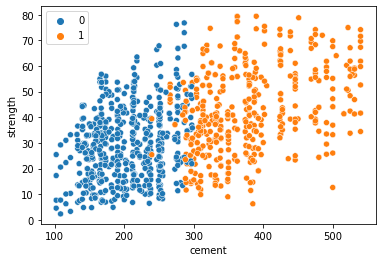

In [41]:
labels = KMeans(n_clusters=2,random_state=42).fit_predict(x) 
sns.scatterplot(x=x.cement,y=y.strength,hue= labels) 

<AxesSubplot:xlabel='slag', ylabel='strength'>

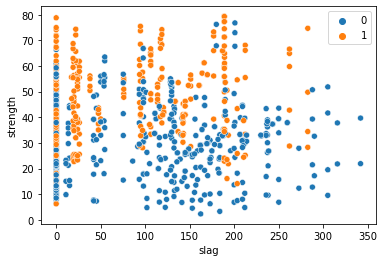

In [42]:
sns.scatterplot(x=x.slag,y=y.strength,hue= labels) 

In [43]:
## Only cement has clusters with strength 

In [44]:
df_labels = pd.DataFrame(labels,columns=["labels"]) 
df_labels.head() 

,labels
0,0
1,0
2,0
3,1
4,0


In [45]:
df_new = df.join(df_labels,how="inner") 

In [46]:
df_new.head() 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,labels
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [47]:
x_new = df_new.drop("strength",axis=1) 

In [48]:
y_new = df[["strength"]] 

In [49]:
build_multiple_model(x_new,y_new) 

,Model_Name,R2_Score,RMSE
8,XGB_Regression,0.885537,5.505430
5,Random_Forest_Regression,0.873724,5.782552
7,GBoost_Regression,0.873334,5.791462
4,Decision_Tree_Regression,0.783363,7.574004
6,Adaboost_Regression,0.767005,7.854742
2,Ridge_Regression,0.697942,8.943423
0,Linear_Regression,0.697934,8.943552
1,Lasso_Reression,0.697402,8.951418
3,KNN_Regression,0.628237,9.921833
9,Support_Vector_Regression,0.188101,14.662563


## after applying clustering accuracy has increased almost 5 % 

In [52]:
k_fold_cv_tunned(x_new,y_new,fold=10) 

,model_name,score_mean,score_std
8,XGBoost Regression,0.904985,0.042959
5,Random forest Regression,0.888420,0.036132
7,GBoost Regression,0.887132,0.059068
3,Decision Tree Regression,0.830604,0.051726
6,Adaboost Regression,0.740663,0.041387
1,Lasso Regression,0.686926,0.062433
2,Ridge Regression,0.686677,0.062324
0,Linear Regression,0.686640,0.062314
4,KNN Regression,0.684321,0.078541
9,Support vector machines Regression,0.223931,0.038833


## learning curve 

In [60]:
def genrate_learning_curve(model_name,estimator,x,Y,fold=10):
    train_size,train_score,test_score = learning_curve(estimator=estimator,X=x,y=Y,cv=fold) 
    train_score_mean = np.mean(train_score,axis=1)
    test_score_mean = np.mean(test_score,axis=1) 
    plt.plot(train_size,train_score_mean,color="blue")
    plt.plot(train_size,test_score_mean,color="orange")
    
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve" + model_name)
    plt.legend("Training accurcy","Testing accurcy") 

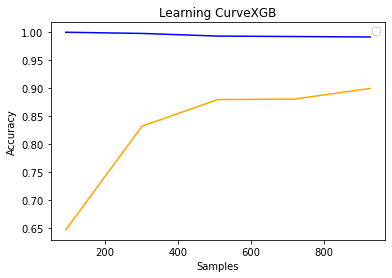

In [61]:
genrate_learning_curve("XGB",XGBRegressor(),x_new,y_new,fold=10) 

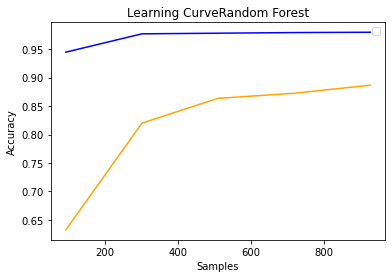

In [62]:
genrate_learning_curve("Random Forest",RandomForestRegressor(),x_new,y_new,fold=10) 

## Feature Importance by using XGBoost Package 

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42) 

xgb = XGBRegressor() 
xgb.fit(x_train,y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

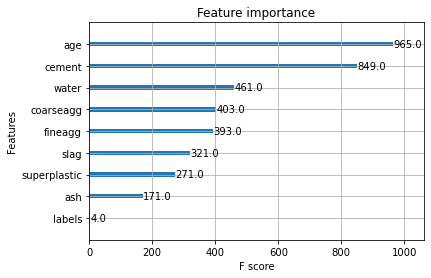

In [67]:
xgboost.plot_importance(xgb) 

In [68]:
x_neww = df[["age","cement","water","coarseagg","fineagg","slag"]] 
y_neww = df[["strength"]] 

In [69]:
k_fold_cv(x_neww,y_neww) 

,model_name,score_mean,score_std
8,XGBoost Regression,0.896645,0.046915
5,Random forest Regression,0.886192,0.033316
7,GBoost Regression,0.875495,0.046392
3,Decision Tree Regression,0.832355,0.052452
6,Adaboost Regression,0.734975,0.038066
1,Lasso Regression,0.679548,0.061547
2,Ridge Regression,0.679539,0.061858
0,Linear Regression,0.679539,0.061858
4,KNN Regression,0.656448,0.088739
9,Support vector machines Regression,0.261459,0.037619


In [70]:
k_fold_cv_tunned(x_neww,y_neww,fold=10) 

,model_name,score_mean,score_std
8,XGBoost Regression,0.905265,0.042435
7,GBoost Regression,0.890261,0.048877
5,Random forest Regression,0.885325,0.034559
3,Decision Tree Regression,0.825229,0.050821
6,Adaboost Regression,0.739431,0.032794
1,Lasso Regression,0.679542,0.061827
2,Ridge Regression,0.679539,0.061857
0,Linear Regression,0.679539,0.061858
4,KNN Regression,0.668799,0.085377
9,Support vector machines Regression,0.261459,0.037619
